## Bivariate Analysis

Vizualizations of two variables. We use these to examine relationships. If we change the level or value of one variable how do we expect the other variable to change. 

We can ask ourself: are their consistent patterns or trends, are their multiple clusters where our data points can fall. 

Quantitative V Quantitative variables: scatterplots

Quantitative V qualitative: violin plots

Qualitative V Qualitative:clustered bar charts

We will also learn about bivariate plot types to summarize data and how to adapt univariate plots for bivariate data

### Scatterplots and Correlation

Relationship between two quantitative variables, this is the go to.

The values of one variable and the other are x and y axis. One point is for every observation in our data. This clearly shows what relationship exists between points.

We often want to quantify the strength of the relationship in linear correlation between two variables: we do this with the `pearson correlation coefficient`. It is identified with `R`

Overview of correlation coefficient: take a value between 1 and -1. 1 is positive relationship between one variable and other. Toward -1 is negative. Strength close to 1 have strong relationship while values close to 0 have weak relationship.

It doesn't tell you steepness of line of relationship and doesn't say anything about non linear relationships. 

If one of our goals is create a regression model, we may want to use a transformation to make realationship linear

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [198]:
fuel_econ = pd.read_csv("fuel_economy.csv")

In [199]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


We will look at relationship between engine displacement in liters and overall fuel mileage in miles per gallon

Is a larger engine associated with a higher or lower mpg

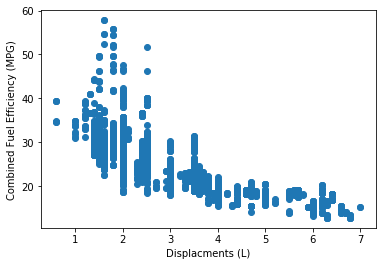

In [200]:
# Scatter function
plt.scatter(data=fuel_econ,
            x='displ', y='comb');
plt.xlabel('Displacments (L)')
plt.ylabel('Combined Fuel Efficiency (MPG)');

Plot suggests a negative correlation. Large amount of variability for the small displacments rather then less variability for larger one 

We can use a regression line as well

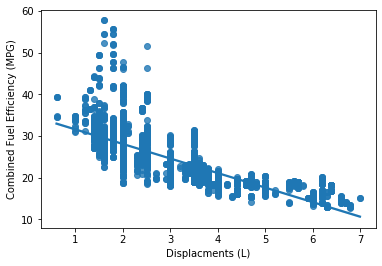

In [201]:
sb.regplot(data=fuel_econ, x='displ',
           y='comb');
plt.xlabel('Displacments (L)')
plt.ylabel('Combined Fuel Efficiency (MPG)');

Hard to see relationship because of lots of overlapping points

## Overplotting, Transparancy, Jitter

- Sometimes scatterplots are hard to interpret

- may be because we have a lot of data points such that we just get a blob

- also if our data is discrete we may have trouble seeing distribution

- too many points in small area is overplotting 

- we can resolve this with:

    - sampling
    
        - we an use random sampling to very large datasets to better see the relationships (e.g. like taking 16,000 data points down to 800)
    
    - transparancy
    
        - This allows us to see overlap of points, which shows us where the highest density areas are. We see peaks of distribution
    
    - jitter
    
        - overlapping points look the same, whcih is an issue
        
        - we add small amount of random noise to each point so that mulitple data points that have same valuees spread over a small area

Fuel Efficiency V manufacturing year

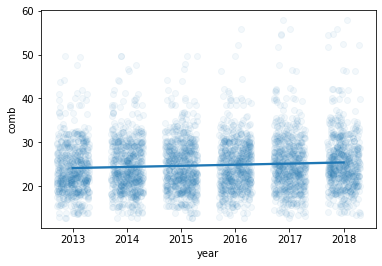

In [202]:
sb.regplot(data=fuel_econ,
           x='year',y='comb',
          x_jitter=0.3,
          scatter_kws={'alpha':1/20});

## Heat Maps

- What it is:

    - 2-d histogram as alternative to a scatter plot
    
    - Two numeric varibales are places on plot axis
    
    - plotting area is divied into grid and number of points in each grid rectangle are added up
    
    - counts are indicated by grid cell color

- Favored over scatterplot:

    - two discrete variables
    
    - good alternative to transparency for a lot of data
    
- Be careful

    - bin size is important
    
    - too large bin size, you may fail to see trends, too small you may end up distracted by noise

- Previously we saw color and data density relationship

- heatmap uses this explicitily

- grid of cells, number of data points in each cell is counted up

- each cell is given a color based on the count of values

- heat map is like a 2-day version of a histogram, from a top down perspective

- we can't use bar heights, so color is next best encoding

- We can add count annotations above each grid cell because color is imprecise



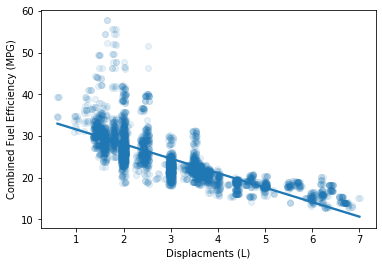

In [203]:
sb.regplot(data=fuel_econ, x='displ',
           y='comb', x_jitter=0.05,
          scatter_kws={'alpha': 1/10});
plt.xlabel('Displacments (L)')
plt.ylabel('Combined Fuel Efficiency (MPG)');

Default: Each dimension by default is split into 10 bins, and the number of points in each rectangular bin is counted up



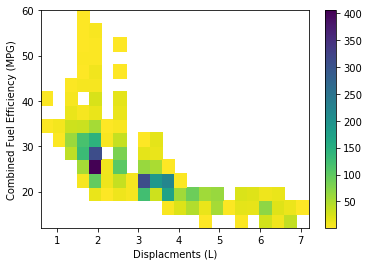

In [204]:
# cmin makes below 0.5 count not a number so that it
# it doesn't display
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12,58+3, 3)
#we have reverse viridis in other color
h2d =plt.hist2d(data=fuel_econ, x='displ', y='comb',
           cmin=0.5, cmap='viridis_r',
          bins=[bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacments (L)');
plt.ylabel('Combined Fuel Efficiency (MPG)');

# Something like below to plot numbers on cells

# But that is easier in seaborn with a parameter. Also
# it is more common in heatmaps with two categorical vars


# counts = h2d[0]

# # loop through the cell counts and add text annotations for each
# for i in range(counts.shape[0]):
#     for j in range(counts.shape[1]):
#         c = counts[i,j]
#         if c >= 7: # increase visibility on darkest cells
#             plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
#                      ha = 'center', va = 'center', color = 'white')
#         elif c > 0:
#             plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
#                      ha = 'center', va = 'center', color = 'black')

In [205]:
#0.3 for displ, 3 for fuel efficiency
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


```python
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12,58+3, 3)
```

We can now see two clusters of high frequency for displ and engine size

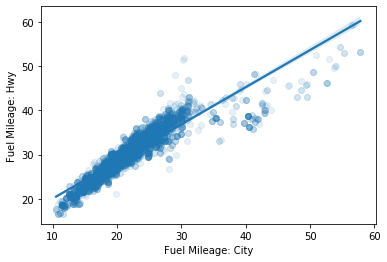

In [206]:
var_x, var_y = 'city', 'highway'
label_x, label_y = 'Fuel Mileage: City', 'Fuel Mileage: Hwy'
sb.regplot(data=fuel_econ,
            x=var_x, y=var_y,
          scatter_kws={'alpha': 1/10});
plt.xlabel(label_x);
plt.ylabel(label_y);

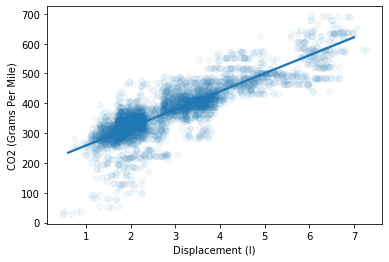

In [207]:
var_x, var_y = 'displ', 'co2'
label_x, label_y = 'Displacement (l)', 'CO2 (Grams Per Mile)'
sb.regplot(data=fuel_econ,
            x=var_x, y=var_y,
           x_jitter=0.3,
          scatter_kws={'alpha': 1/20});
plt.xlabel(label_x);
plt.ylabel(label_y);

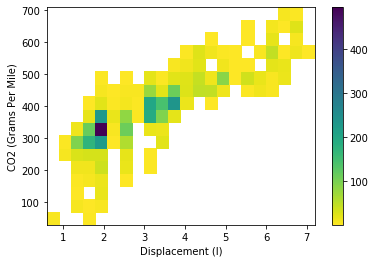

In [208]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(29, 692+40, 40)

var_x, var_y = 'displ', 'co2'
label_x, label_y = 'Displacement (l)', 'CO2 (Grams Per Mile)'
plt.hist2d(data=fuel_econ,
                x=var_x,
                y=var_y,
                cmin=0.5,
                cmap='viridis_r',
                bins=[bins_x, bins_y]
               
              );
plt.colorbar()
plt.xlabel(label_x);
plt.ylabel(label_y);


In [209]:
#0.3 for displ, 3 for fuel efficiency
fuel_econ[['displ', 'co2']].describe()

,displ,co2
count,3929.000000,3929.000000
mean,2.950573,376.564266
std,1.305901,92.338892
min,0.600000,29.000000
25%,2.000000,315.000000
50%,2.500000,369.000000
75%,3.600000,429.000000
max,7.000000,692.000000


```python
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(29, 692+30, 30)

```

## Violin Plots

- When we have two variables, at least one of them discrete, jitter and transparacny can make trends clearer

- Quantitiatie vs qualitiative we can take the same approach

    - we can map each qualitiative value to an arbritary number
    
- Violin Plot is better for this

    - On each categorical variable, the area depicts the distribution of points

In [210]:
fuel_econ.sample(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
2950,37959,BMW,M240i Coupe,2017,Subcompact Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,6,3.0,89,0,21.3931,27.1985,31.6341,45.5481,25.0411,358,5,5
1840,35732,Chevrolet,Cruze,2015,Midsize Cars,Front-Wheel Drive,Automatic (S6),Diesel,4,2.0,0,94,26.7185,34.8000,44.0221,66.3000,32.4600,314,8,7
3381,38754,BMW,530e,2018,Compact Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,4,2.0,0,99,27.3323,35.7000,30.7898,44.2000,28.7869,193,8,10
3641,39217,Porsche,911 Carrera 4 GTS Cabriolet,2018,Minicompact Cars,4-Wheel Drive,Automatic (AM-S7),Premium Gasoline,6,3.0,68,0,19.8000,25.0000,25.3000,35.6000,21.9000,402,4,4
64,32384,Porsche,911 Carrera 4,2013,Minicompact Cars,4-Wheel Drive,Automatic (AM-S7),Premium Gasoline,6,3.4,70,0,19.9494,25.2000,27.3565,38.8000,22.7173,391,6,6


In [211]:
# Ordinal by size of car
# Now we wont need order in viz
sedan_classes = [
 'Minicompact Cars','Subcompact Cars','Compact Cars',
 'Midsize Cars',
 'Large Cars']

In [212]:
vclasses = pd.CategoricalDtype(ordered=True,
                               categories= sedan_classes)
fuel_econ['VClass'] =fuel_econ['VClass'].astype(vclasses)

In [213]:
fuel_econ.sample(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
2268,36575,Volkswagen,Golf,2016,Compact Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,1.8,0,0,25.1342,32.5000,35.0586,51.1000,28.8033,309,7,7
398,32985,Mercedes-Benz,E350,2013,Midsize Cars,Rear-Wheel Drive,Automatic 7-spd,Premium Gasoline,6,3.5,0,98,19.6516,24.7909,29.3263,41.8822,23.0776,385,6,6
358,32945,Mitsubishi,Lancer,2013,Compact Cars,Front-Wheel Drive,Automatic (AV-S6),Regular Gasoline,4,2.4,0,93,22.8983,29.3100,29.6409,42.3785,25.5096,347,7,7
2638,37338,Mitsubishi,Mirage G4,2017,Compact Cars,Front-Wheel Drive,Manual 5-spd,Regular Gasoline,3,1.2,0,90,32.6414,43.7032,39.7448,58.9226,35.4962,249,8,8
2803,37711,Mercedes-Benz,E400 4matic Coupe,2017,Subcompact Cars,4-Wheel Drive,Automatic 7-spd,Premium Gasoline,6,3.0,81,0,19.9494,25.2000,27.7421,39.4000,22.8360,387,5,5


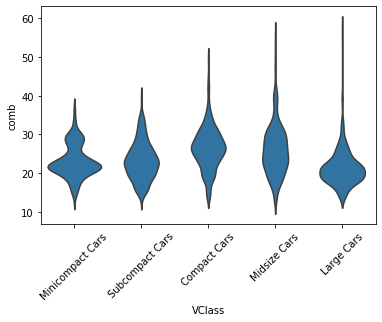

In [214]:
# Inner is an optional box plot
var_x, var_y = 'VClass', 'comb'
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ,
              x=var_x,
              y=var_y, 
              color=base_color,
             inner=None);
plt.xticks(rotation=45);

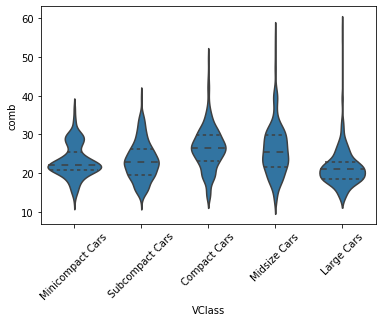

In [215]:
# Shows inner quartiles similar to box plot
var_x, var_y = 'VClass', 'comb'
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ,
              x=var_x,
              y=var_y, 
              color=base_color,
             inner='quartile');
plt.xticks(rotation=45);

Interpretation example:  you can see that the numeric data takes on a different shape in each categorical level: Some bimodality is suggested in group Alpha, a relatively high variance is observed in Beta, and Gamma and Delta are skewed negatively and positively, respectively.

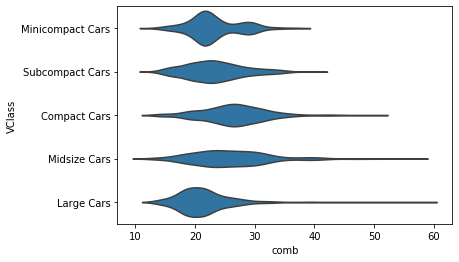

In [216]:
# We can create a horizontal violin plot by placing
# categorical variable on the y axis
sb.violinplot(data=fuel_econ,
              x=var_y,
              y=var_x, 
              color=base_color,
             inner=None);

## Box Plots

- Alternative to violin plot

    - summarize violin plot relationships

- Graphic depiction of descriptive statistics

- Central line is media, show first and third quartile, shows min and max at tails

- IQR is shown to show spread

- Even though whiskers are typically min/ max, we can plot outside of whiskers with outliers

    - e.g. usually we do 1.5 times IQR is outside the whiskers
    
    - e.g. Q3-Q1 = 5.5, 1.5 * 5.5 = 8.25, so if median is 55, then 55 + 8.25 = 63.25 which is upper tail of boxplot
    
        - then we can see outliers above that, max is 68 so we see it above top whisker
        
- Tells a different story about variability then violin plot, so it is best to choose best

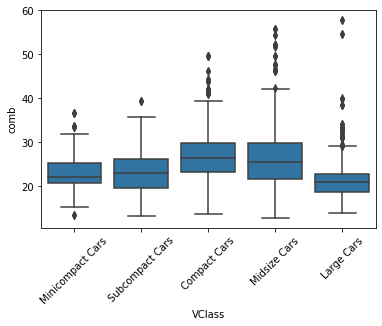

In [217]:
sb.boxplot(data=fuel_econ,
              x=var_x,
              y=var_y, 
              color=base_color);
plt.xticks(rotation=45);

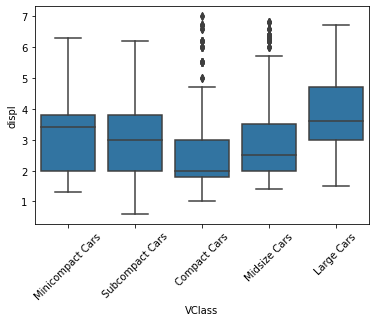

In [218]:
x_var = "VClass"
y_var = "displ"
sb.boxplot(data=fuel_econ, x=x_var,y=y_var,
             color=base_color)
plt.xticks(rotation=45);

## Clustered Bar Chart

- Comparrison of two Categorical variables goes beyond positional encodings

- We can use heatmap

- clustered bar chart, same as univariate bar graph, but multiple bars for each level we want to plot

    - color to show different levels
    
- Clustered bar chart is easier to understand

In [219]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [220]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


In [221]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [222]:
ct_counts = ct_counts.pivot(index='VClass', columns= 'trans_type', values='count')

In [226]:
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


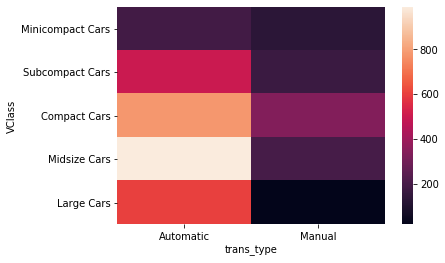

In [228]:
sb.heatmap(ct_counts);

Conclusion: this is a very hard to read plot and not very useful

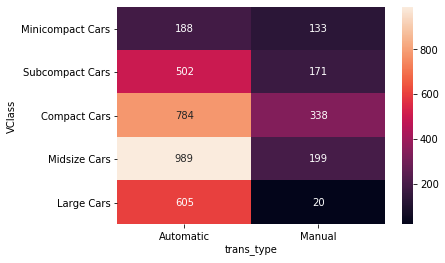

In [230]:
sb.heatmap(ct_counts, annot=True, fmt='d');

This is a little better, but still not much better then a typical table

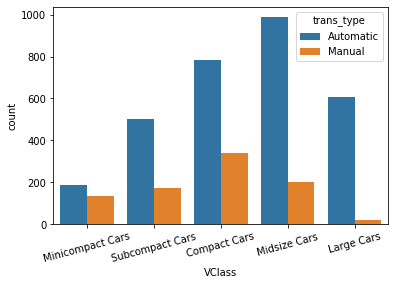

In [234]:
sb.countplot(data=fuel_econ, x='VClass',
             hue='trans_type');
plt.xticks(rotation=15);

In [240]:
fuel_econ.fuelType.value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

Clustered bar chart is so much easier to see

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

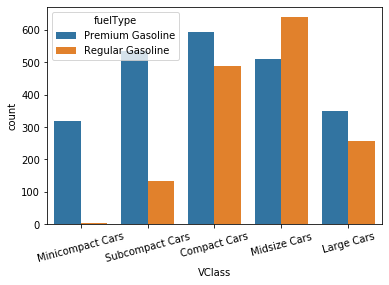

In [251]:
fuel_types = fuel_econ[['VClass', 'fuelType']] \
    .query("fuelType == 'Premium Gasoline' or fuelType == 'Regular Gasoline'")
sb.countplot(data=fuel_types, x='VClass', hue='fuelType');
plt.xticks(rotation=15)

## Faceting

- Clustered bar chart is a lot like a bunch of univariate bar charts

- Multiple copies of the same type of plot visualized on different subsets of the data if faceted plot

- We can do this with any univariate plot

    - we can see a violin plot with 3 categorical variables as a series of 3 histograms with the categorical variable seperating the charts
    
- Good for

    - breaking down potentially complex patterns into simpller parts
    
    - especially good for categorical variables with lots of levels
    
- Wee need to make sure:

    - access scales and limits consistent across each subplot
    
    - failuree to do this will lead to misconcenptions

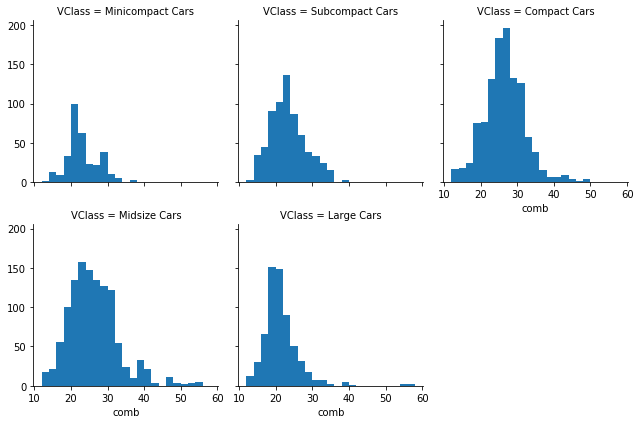

In [257]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col='VClass',
                col_wrap=3)
g.map(plt.hist, 'comb', bins=bins);

## Adaption of Univariate Plots

- Histograms and bar charts, we had frequency on y axis

    - we can include error bar at top and the mean of the scond variable 

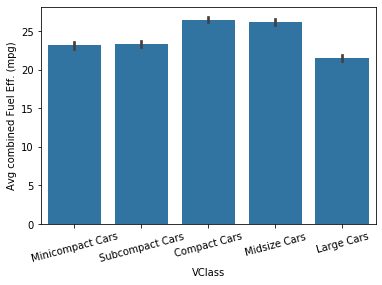

In [265]:
base_color = sb.color_palette()[0]
# by default we can include errwidth=0 to make 
# error go away or change ci=sd to plot standard deviation
sb.barplot(data=fuel_econ, x='VClass', y='comb',
          color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg combined Fuel Eff. (mpg)');

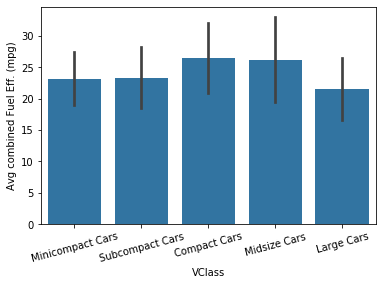

In [266]:
sb.barplot(data=fuel_econ, x='VClass', y='comb',
          color=base_color, ci='sd')
plt.xticks(rotation=15);
plt.ylabel('Avg combined Fuel Eff. (mpg)');

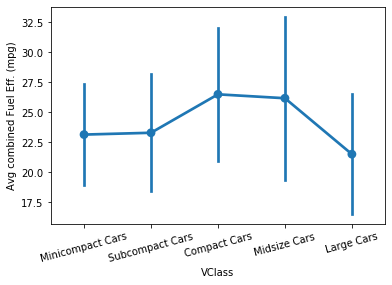

In [267]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd')
plt.xticks(rotation=15);
plt.ylabel('Avg combined Fuel Eff. (mpg)');

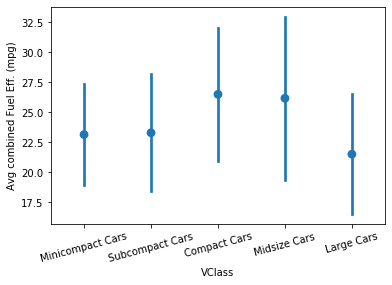

In [269]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb',
             ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg combined Fuel Eff. (mpg)');

## Line Plots

- Relationship between two quantitative variables with a line

    - at an x value we get the average of the y variable at that point
    
    - similar to a histogram with an average on y axis and point positions instead of bar heights
    
- Emphasize

    - we are interested in relative change
    
    - emphasizes trends across x values (so it would be innappropriate if we had a categorical variable on x axis
    
- Good for data across time, especially for stocks or currency vaulues (economic data)

    - one measurement per time value, so we are connecting not averages but the raw value
    
    - clearly shows changes over time
    
    - this is a time series plot

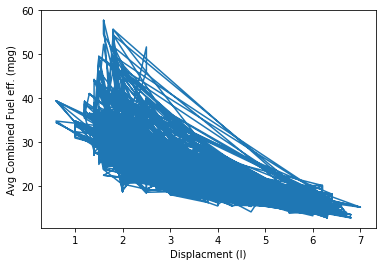

In [271]:
# THis is bad, because we need all data sorted by x variabl
# and only 1 y value per x value
plt.errorbar(data = fuel_econ, x='displ', y='comb')
plt.xlabel('Displacment (l)');
plt.ylabel('Avg Combined Fuel eff. (mpg)');

In [279]:
# This will help us plot points in accurate positions, at
# bin center
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.2

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest=True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

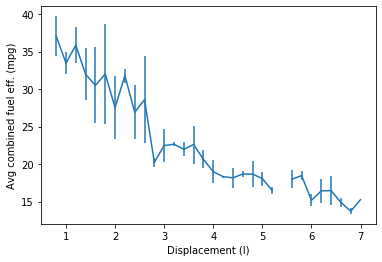

In [280]:
plt.errorbar(x = bins_c, y = comb_mean, yerr=comb_std)
plt.xlabel('Displacement (l)')
plt.ylabel('Avg combined fuel eff. (mpg)');

Plot: Distribuiton of comb by make for all manufacturers with at least 80 cars. Consider which manufacturer order will convey the most information

In [348]:
comb_make = fuel_econ[['comb', 'make']]
makes = (comb_make.make.value_counts()  > 80).reset_index()
cols = list(makes.query("make == False").iloc[:, 0])
order = list(makes.query("make == True").iloc[:, 0])
for drop_col in cols:
    comb_make = comb_make[comb_make.make != drop_col]

,comb,make
1,25.2227,Volkswagen
2,20.6716,Volkswagen
3,19.8774,Volkswagen
4,28.6813,Chevrolet
5,22.6002,Lexus
...,...,...
3924,54.4329,Toyota
3925,41.0000,Hyundai
3926,42.0000,Hyundai
3927,23.0021,Lexus


In [350]:
comb_make.groupby(['make']).mean()

,comb
make,
Audi,23.639240
BMW,23.004798
Cadillac,21.773203
Chevrolet,27.224809
Dodge,21.812190
Ford,26.796018
Honda,31.588841
Hyundai,28.793620
Infiniti,23.002081


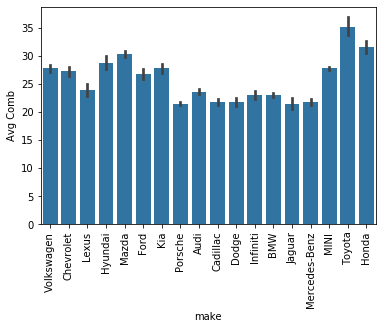

In [357]:
base_color = sb.color_palette()[0]
sb.barplot(data=comb_make, x="make", y="comb", color=base_color)
plt.xticks(rotation=90)
plt.ylabel("Avg Comb");